# Kaggle Competition: Pet Adoption

`source`: https://www.kaggle.com/c/petfinder-adoption-prediction/

## Description
Millions of stray animals suffer on the streets or are euthanized in shelters every day around the world. If homes can be found for them, many precious lives can be saved — and more happy families created.

[PetFinder.my](https://petfinder.my/) has been Malaysia’s leading animal welfare platform since 2008, with a database of more than 150,000 animals. PetFinder collaborates closely with animal lovers, media, corporations, and global organizations to improve animal welfare.

Animal adoption rates are strongly correlated to the metadata associated with their online profiles, such as descriptive text and photo characteristics. As one example, PetFinder is currently experimenting with a simple AI tool called the Cuteness Meter, which ranks how cute a pet is based on qualities present in their photos.

In this competition you will be developing algorithms to predict the adoptability of pets - specifically, how quickly is a pet adopted? If successful, they will be adapted into AI tools that will guide shelters and rescuers around the world on improving their pet profiles' appeal, reducing animal suffering and euthanization.

Top participants may be invited to collaborate on implementing their solutions into AI tools for assessing and improving pet adoption performance, which will benefit global animal welfare.

### Data Description
In this competition you will predict the speed at which a pet is adopted, based on the pet’s listing on PetFinder. Sometimes a profile represents a group of pets. In this case, the speed of adoption is determined by the speed at which all of the pets are adopted. The data included text, tabular, and image data. See below for details. 
This is a Kernels-only competition. At the end of the competition, test data will be replaced in their entirety with new data of approximately the same size, and your kernels will be rerun on the new data.

#### File descriptions
* `train.csv` - Tabular/text data for the training set
* `test.csv` - Tabular/text data for the test set
* `sample_submission.csv` - A sample submission file in the correct format
* `breed_labels.csv` - Contains Type, and BreedName for each BreedID. Type $1$ is dog, $2$ is cat.
* `color_labels.csv` - Contains ColorName for each ColorID
* `state_labels.csv` - Contains StateName for each StateID

#### Data Fields
* `PetID` - Unique hash ID of pet profile
* `AdoptionSpeed` - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.
* `Type` - Type of animal ($1$ = Dog, $2$ = Cat)
* `Name` - Name of pet (Empty if not named)
* `Age` - Age of pet when listed, in months
* `Breed1` - Primary breed of pet (Refer to BreedLabels dictionary)
* `Breed2` - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)
* `Gender` - Gender of pet ($1$ = Male, $2$ = Female, $3$ = Mixed, if profile represents group of pets)
* `Color1` - Color 1 of pet (Refer to ColorLabels dictionary)
* `Color2` - Color 2 of pet (Refer to ColorLabels dictionary)
* `Color3` - Color 3 of pet (Refer to ColorLabels dictionary)
* `MaturitySize` - Size at maturity ($1$ = Small, $2$ = Medium, $3$ = Large, $4$ = Extra Large, $0$ = Not Specified)
* `FurLength` - Fur length ($1$ = Short, $2$ = Medium, $3$ = Long, $0$ = Not Specified)
* `Vaccinated` - Pet has been vaccinated ($1$ = Yes, $2$ = No, $3$ = Not Sure)
* `Dewormed` - Pet has been dewormed ($1$ = Yes, $2$ = No, $3$ = Not Sure)
* `Sterilized` - Pet has been spayed / neutered ($1$ = Yes, $2$ = No, $3$ = Not Sure)
* `Health` - Health Condition ($1$ = Healthy, $2$ = Minor Injury, $3$ = Serious Injury, $0$ = Not Specified)
* `Quantity` - Number of pets represented in profile
* `Fee` - Adoption fee ($0$ = Free)
* `State` - State location in Malaysia (Refer to StateLabels dictionary)
* `RescuerID` - Unique hash ID of rescuer
* `VideoAmt` - Total uploaded videos for this pet
* `PhotoAmt` - Total uploaded photos for this pet
* `Description` - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.

#### AdoptionSpeed
Contestants are required to predict this value. The value is determined by how quickly, if at all, a pet is adopted. The values are determined in the following way:
* $0$ - Pet was adopted on the same day as it was listed. 
* $1$ - Pet was adopted between 1 and 7 days (1st week) after being listed. 
* $2$ - Pet was adopted between 8 and 30 days (1st month) after being listed. 
* $3$ - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed. 
* $4$ - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).

#### Images
For pets that have photos, they will be named in the format of *`PetID-ImageNumber.jpg`*. Image $1$ is the profile (`default`) photo set for the pet. For privacy purposes, faces, phone numbers and emails have been masked.

#### Image Metadata
We have run the images through **`Google's Vision API`**, providing analysis on `Face Annotation`, `Label Annotation`, `Text Annotation` and `Image Properties`. You may optionally utilize this supplementary information for your image analysis.

File name format is *`PetID-ImageNumber.json`*.

Some properties will not exist in JSON file if not present, i.e. Face Annotation. Text Annotation has been simplified to just 1 entry of the entire text description (instead of the detailed JSON result broken down by individual characters and words). Phone numbers and emails are already anonymized in Text Annotation.

Google Vision API reference: https://cloud.google.com/vision/docs/reference/rest/v1/images/annotate

#### Sentiment Data
We have run each pet profile's description through **`Google's Natural Language API`**, providing analysis on sentiment and key entities. You may optionally utilize this supplementary information for your pet description analysis. There are some descriptions that the API could not analyze. As such, there are fewer sentiment files than there are rows in the dataset.

File name format is *`PetID.json`*.

Google Natural Language API reference: https://cloud.google.com/natural-language/docs/basics

## Import the Pet Adoption Training Dataset

In [1]:
import pandas as pd
import csv
%matplotlib inline

# Loading the data/train/train.csv
df = pd.read_csv('./data/train/train.csv')

### Finding the missing values

It is very common to observe that the real-world datasets often have missing values due to myriad number of reasons.

Missing values are not ideal for any Machine Learning algorithm to optimally decipher the patterns in the data

Using the below code, we can find that `Name` column has $1257$ missing values and `Description` column has $12$ values

In [2]:
# Finding out the missing values
df.isnull().sum()

Type                0
Name             1257
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        12
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dtype: int64

### Dropping Irrelevant  Columns

* `Name`, `PetID`, `RescuerID`
    * It makes sense to not have `Name` column because it does not help us predict how faster a pet animal will be adopted as we know that any prospective pet owner will not adopt a pet animal based on its name.
    * Likewise `PetID`, `RescuerID` also have no relevance to the task at hand
* However, for now to simplify the modeling let's ignore the following columns
    * `Fee` - Might have some implication if a pet will adopted (Need to check the correlation)
    * `State` - Might not influence the adoption speed (Need to check the correlation)
    * `VideoAmt`, `PhotoAmt` & `Description` - Will have some impact on the adoption speed. Because a beautiful looking pet might get adopted sooner. But just to make the modeling simpler let's ignore it these columns as well for now.

In [3]:
# Dropping the name column
df = df.drop(labels=['Name', 'PetID', 'Fee', 'State', 'RescuerID', 'VideoAmt', 'PhotoAmt', 'Description'], 
             axis=1)

### `Age` column is in months

In [4]:
# Converting the Months to Years
df['Age'] /= 12

## Generate Descriptive Statistics

Taking a look at the descriptive statistics often helps us understand the data in each column quicker. And, very often we can find out the abnormal data in each column

In [5]:
df.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,0.871006,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,2.516441
std,0.498217,1.512983,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,0.166667,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.000000,0.250000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
75%,2.000000,1.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,4.000000
max,2.000000,21.250000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,4.000000


### Understanding the Descriptive Statistics

Just by glancing at the above table, columns `Age`, `Breed1`, `Color 2` & `Color 3` standout especially.

Because the `min` value in each of the above mentioned columns is `0`.

* **`Age`** of $0$ years is an abnormal value
    * This indicates that the value for age is missing
    * Need to replace the $0$ with `None`

```python
# TODO: Create a quantitative Imputer to fill the missing `Age` value
```

* **`Breed1`** number $0$ is an abnormal value.

    * `BreedID` for Dogs ranges from $1 - 241$
    * `BreedID` for Cats ranges from $242 - 307$
    * `Breed2` value of $0$ indicates the pet is pure breed

```python
# TODO: Create a categorical imputer (df[col].value_counts.index[0])

# TODO: Make sure to impute dog and cat categories separately
```

* **`Color2`** & **`Color3`** has color $0$

    * `ColorID` ranges from $1 - 7$
      
      
| Color  	| ColorID 	|
|--------	|---------	|
| Black  	| $1$       |
| Brown  	| $2$       |
| Golden 	| $3$      	|
| Yellow 	| $4$      	|
| Cream  	| $5$      	|
| Gray   	| $6$      	|
| White  	| $7$      	|

In [6]:
# Fill the above columns with 0 with None
def replace_with_None(value=None, col=None, df=None):
    df[col] = df[col].map(lambda x: x if x != value else None)

# Replacing Age: 0 => None
replace_with_None(value=0, col='Age', df=df)

# Replacing Breed1: 0 => None
replace_with_None(value=0, col='Breed1', df=df)

# Replacing Color2 and Color3: 0 => None
replace_with_None(value=0, col='Color2', df=df)
replace_with_None(value=0, col='Color3', df=df)

df.isnull().sum()

Type                 0
Age                179
Breed1               5
Breed2               0
Gender               0
Color1               0
Color2            4471
Color3           10604
MaturitySize         0
FurLength            0
Vaccinated           0
Dewormed             0
Sterilized           0
Health               0
Quantity             0
AdoptionSpeed        0
dtype: int64

### Missing Values per column
* `Age` - $179$ missing values
* `Color2` - $4471$ missing values
* `Color3` - $10604$ missing values

In [7]:
lost_data = 100.0 - ((len(df) - 10604)/len(df))*100.0
print("Lost Data is {}%".format(lost_data))

Lost Data is 70.72633895818049%


If we choose to remove the rows where `Color3` is $None$. Then we would essentially loose $72%$ of the data.

Losing $72%$ of the data will prevent the model from learning more intricate patterns hidden in the data.

Hence, instead of removing the rows that contain $None$, we shall impute the values for the missing rows using [`Imputer`](https://sklearn.org/modules/generated/sklearn.preprocessing.Imputer.html) class.

The generic `Imputer` class does not however meet our requirements, hence we can implement a custom imputer class by subclassing from [`TransformerMixIn`](https://scikit-learn.org/stable/modules/generated/sklearn.base.TransformerMixin.html) as shown below

In [8]:
from sklearn.base import TransformerMixin
from sklearn.preprocessing import Imputer

class CustomQuantitativeImputer(TransformerMixin):

    def __init__(self, cols=None, strategy='mean'):

        if not cols:
            raise ValueError("'{}' cannot be {}".format('cols', None))

        if not strategy:
            raise ValueError("'{}' cannot be {}".format('strategy', None))

        if not isinstance(cols, list):
            raise TypeError("'{}' should be of {}".format('cols', list))

        if not isinstance(strategy, str):
            raise TypeError("'{}' should be of {}".format('strategy', str))

        self.cols = cols
        self.strategy = strategy

    def _impute_null_with_strategy(self, col=None, X=None):

        # Categorising the data into Dogs and Cats
        dog_data = X[X['Type']==1]
        cat_data = X[X['Type']==2]

        _dog, _cat = None, None

        # Finding per category Mean / Median         
        if self.strategy == 'median':
            _dog = dog_data[col].median()
            _cat = cat_data[col].median()
        else:
            _dog = dog_data[col].mean()
            _cat = cat_data[col].mean()
        
        # Finding the rows (indices) with missing values in a column
        dog_missing_indices = dog_data[dog_data[col].isnull()].index
        cat_missing_indices = cat_data[cat_data[col].isnull()].index

        # Imputing the missing values in column(s) with Mean / Median value per category
        X.loc[dog_missing_indices, col] = _dog
        X.loc[cat_missing_indices, col] = _cat
        
        return X[col]

    def transform(self, df):
        X = df.copy()

        # TODO: Impute the missing values using self.strategy in each column
        for col in self.cols:
            X[col] = self._impute_null_with_strategy(col=col, X=X)

        return X

    def fit(self, *_):
        return self

class CustomCategoricalImputer(TransformerMixin):
    
    def __init__(self, cols=None):

        if not cols:
            raise ValueError("'{}' cannot be {}".format('cols', cols))

        if not isinstance(cols, list):
            raise TypeError("'{}' should be of {}".format('cols', list))

        self.cols = cols

    def _impute_null_per_category(self, col=None, X=None):
        """
        Return the column (col) in pd.Dataframe (X) 
        imputed with mode value in missing rows

        Args:
            col: Name of the column with missing values
            X: Pandas Dataframe
        """

        dog_data = X[X['Type']==1]
        cat_data = X[X['Type']==2]

        _dog = dog_data[col].value_counts().index[0]
        _cat = cat_data[col].value_counts().index[0]

        # TODO: Try to replace below four lines of code with `fillna`

        # Finding the rows (indices) with missing values in a column
        dog_missing_indices = dog_data[dog_data[col].isnull()].index
        cat_missing_indices = cat_data[cat_data[col].isnull()].index

        # Imputing the missing values in column(s) with Mean / Median value per category
        X.loc[dog_missing_indices, col] = _dog
        X.loc[cat_missing_indices, col] = _cat

        return X[col]

    def transform(self, df):
        X = df.copy()

        for col in self.cols:
            X[col] = self._impute_null_per_category(col=col, X=X)

        return X

    def fit(self, *_):
        return self

In [9]:
from sklearn.pipeline import Pipeline

imputer = Pipeline([('quant', CustomQuantitativeImputer(cols=['Age'])), 
                    ('category', CustomCategoricalImputer(cols=['Breed1', 'Color2', 'Color3']))])
df_imputed = imputer.fit_transform(df)

In [10]:
df_imputed.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,0.881164,265.372240,74.009738,1.776162,2.234176,4.314480,6.832855,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,2.516441
std,0.498217,1.510153,59.864907,123.011575,0.681592,1.745225,2.223357,0.643555,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,1.177265
min,1.000000,0.083333,1.000000,0.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,0.166667,265.000000,0.000000,1.000000,1.000000,2.000000,7.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.000000,0.250000,266.000000,0.000000,2.000000,2.000000,4.000000,7.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
75%,2.000000,1.000000,307.000000,179.000000,2.000000,3.000000,7.000000,7.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,4.000000
max,2.000000,21.250000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,4.000000


In [11]:
dog_breeds = df_imputed[(df_imputed['Breed1']>=1) & (df_imputed['Breed1']<=241)]
cat_breeds = df_imputed[(df_imputed['Breed1']>=242) & (df_imputed['Breed1']<=307)]

### Analysis of Dogs and Cats Data Distributions

#### Anomalies in Dogs Data
In $4^{th}$ row, $3^{rd}$ column, `Type` column should be $1$ for all the dog breeds. However, we can see that some rows of data with `dog` breeds have been marked as `cats`.

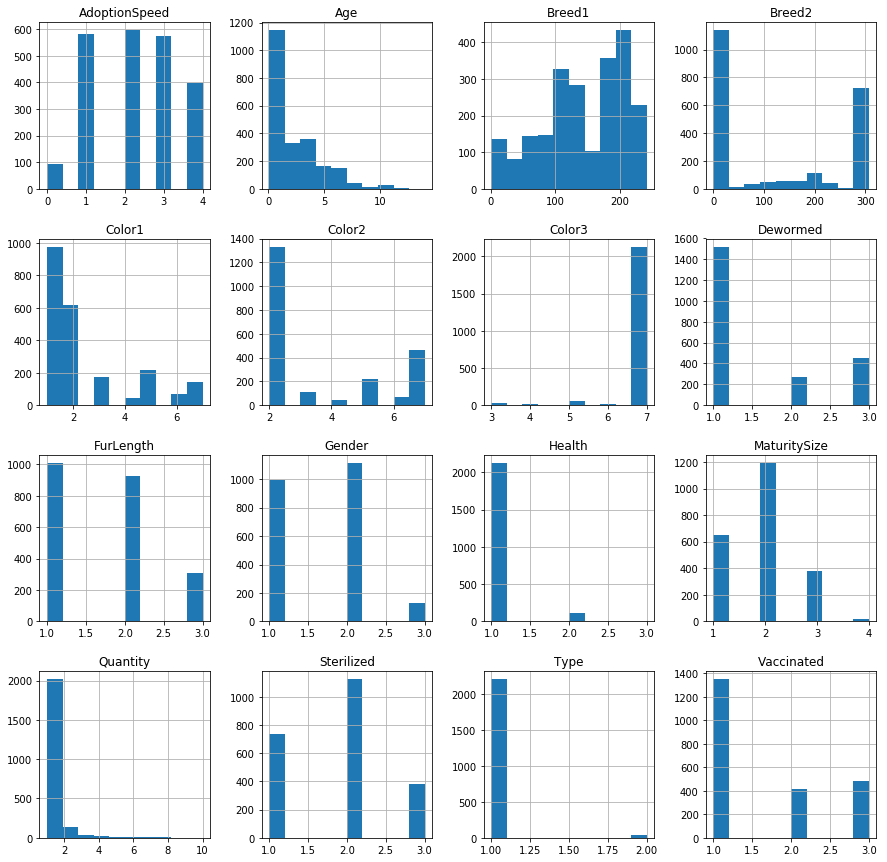

In [12]:
_ = dog_breeds.hist(figsize=(15, 15))

#### Anomalies in Cats Data
In $4^{th}$ row, $3^{rd}$ column, `Type` column should be $2$ for all the cat breeds. However, we can see that almost $50\%$ of data rows with `cat` breeds have been marked as `dogs`.

The above mentioned anomaly can assumed to be because of human errors often seen in manual data collection/entry process

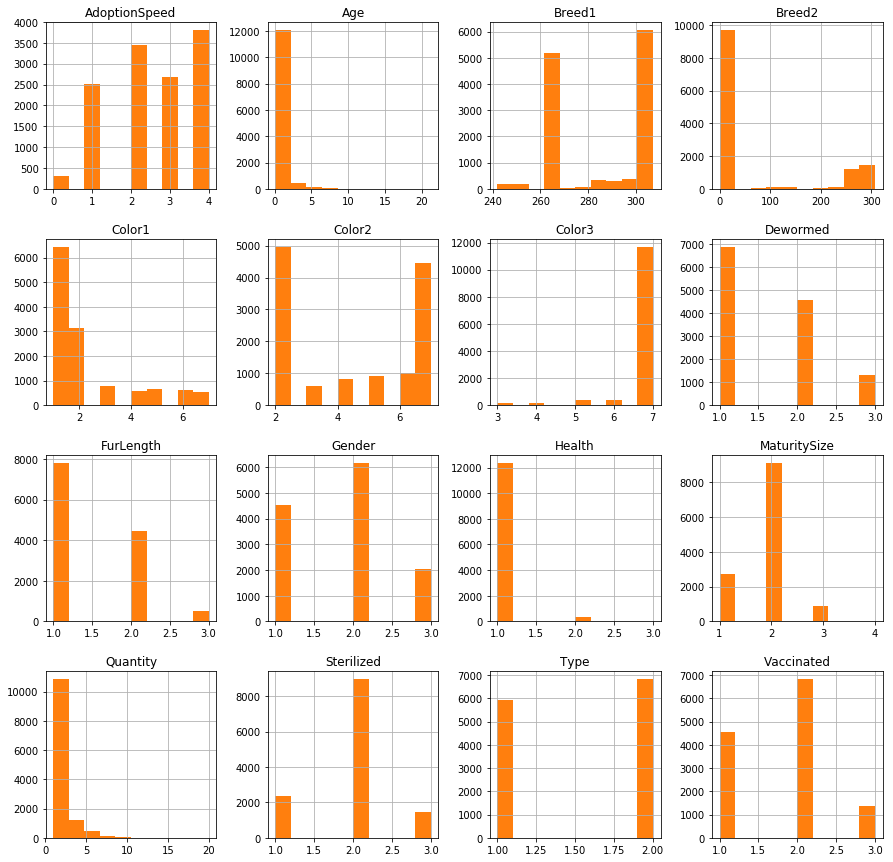

In [13]:
_ = cat_breeds.hist(figsize=(15, 15), color='C1')

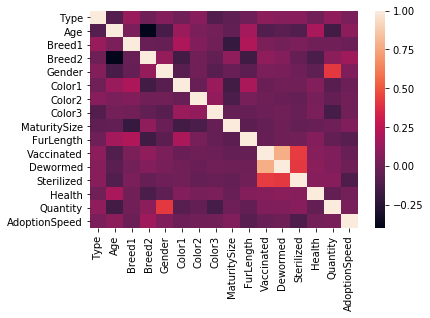

In [14]:
from seaborn import heatmap

def plot_corr_heatmap(df=None):
    heatmap(df.corr())

# Plot Dog Breeds Correlation Matrix
plot_corr_heatmap(df=dog_breeds)

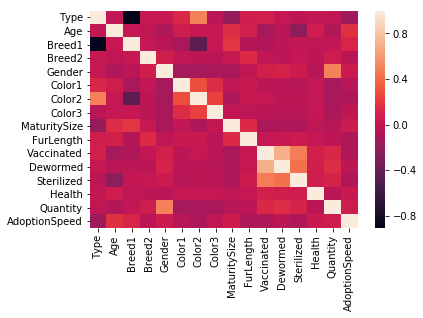

In [15]:
# Plot Cat Breeds Correlation Matrix
plot_corr_heatmap(df=cat_breeds)

### Dummify Categorical Columns


In [16]:
class CustomDummifier(TransformerMixin):
    def __init__(self, cols=None):
        self.cols = cols
    def transform(self, X):
        return pd.get_dummies(X, columns=self.cols)
    def fit(self, *_):
        return self

    
categorical_columns = ['Type', 'Breed1', 'Breed2', 'Gender', 
                       'Color1', 'Color2', 'Color3', 'MaturitySize', 
                       'FurLength', 'Vaccinated', 'Sterilized', 
                       'Dewormed', 'Health', 'Quantity']

custom_dummifier = CustomDummifier(cols=categorical_columns)
df_imputed = custom_dummifier.fit_transform(df_imputed)

df_imputed.head()

,Age,AdoptionSpeed,Type_1,Type_2,Breed1_1.0,Breed1_3.0,Breed1_5.0,Breed1_7.0,Breed1_10.0,Breed1_11.0,...,Quantity_10,Quantity_11,Quantity_12,Quantity_13,Quantity_14,Quantity_15,Quantity_16,Quantity_17,Quantity_18,Quantity_20
0,0.250000,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.083333,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.083333,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.333333,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.083333,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Scaling the Data

In [17]:
from sklearn.preprocessing import MinMaxScaler

class CustomMinMaxScaler(TransformerMixin):
    def __init__(self, cols):
        self.cols = cols

    def transform(self, df=None):
        X = df.copy()
        _minmax_scaler = MinMaxScaler()        

        for col in self.cols:
            X[self.cols] = _minmax_scaler.fit_transform(X[self.cols])
        return X

    def fit(self, *_):
        return self

minmax_scaler = CustomMinMaxScaler(cols=['Age'])
df_imputed = minmax_scaler.fit_transform(df_imputed)
df_imputed.head()

,Age,AdoptionSpeed,Type_1,Type_2,Breed1_1.0,Breed1_3.0,Breed1_5.0,Breed1_7.0,Breed1_10.0,Breed1_11.0,...,Quantity_10,Quantity_11,Quantity_12,Quantity_13,Quantity_14,Quantity_15,Quantity_16,Quantity_17,Quantity_18,Quantity_20
0,0.007874,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.011811,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df_imputed.to_csv('./data/train/train_scaled.csv', index=False)

In [19]:
adoption_speed = df_imputed['AdoptionSpeed']

In [20]:
X = df_imputed.drop(labels=['AdoptionSpeed'], axis=1)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from timeit import default_timer as timer

start = timer()
knn = KNeighborsClassifier(n_neighbors=5)
knn_average = cross_val_score(knn, X, adoption_speed).mean()
end = timer()
print("Average accuracy is {}%".format(round(knn_average*100, 2)))
print("Model Fit time is {} minutes".format(round((end-start)/60, 2)))

/home/mbgorantla/anaconda3/envs/dog-project/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Average accuracy is 31.17%
Model Fit time is 1.01 minutes


In [22]:
from xgboost import XGBClassifier

start = timer()
xgb = XGBClassifier()
xgb_average = cross_val_score(xgb, X, adoption_speed).mean()
end = timer()
print("Average accuracy is {}%".format(round(xgb_average*100, 2)))
print("Model Fit time is {} minutes".format(round((end-start)/60, 2)))

/home/mbgorantla/anaconda3/envs/dog-project/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Average accuracy is 38.01%
Model Fit time is 0.99 minutes


In [23]:
from joblib import dump

# Save the KNN Classifier model
_ = dump(knn, 'saved_models/knn_model.joblib')

# Save the XGBoost Model
_ = dump(xgb, 'saved_models/xgb_model.joblib')